### Pandas Dataframe: Plot Examples with Matplotlib and Pyplot

### Sample data for examples

In [1]:
import pandas as pd

df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

In [2]:
df

,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,peter,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2
5,lisa,33,F,texas,1,2
6,jose,20,M,texas,4,3


Pandas has tight integration with matplotlib.

You can plot data directly from your DataFrame using the plot() method:

##### Scatter plot of two columns

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# a scatter plot comparing num_children and num_pets
df.plot(kind='scatter',x='num_children',y='num_pets',color='red')
plt.show()

<Figure size 640x480 with 1 Axes>

##### Bar plot of column values

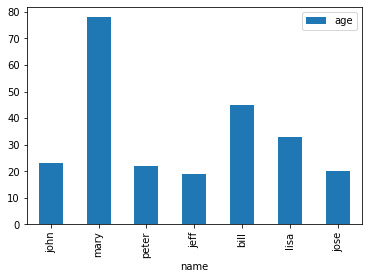

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# a simple line plot
df.plot(kind='bar',x='name',y='age')

##### Line plot, multiple columns

Just reuse the Axes object.

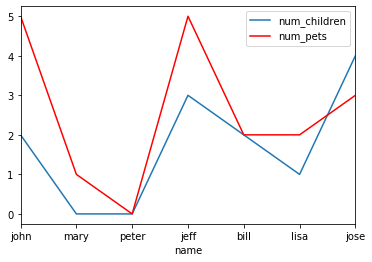

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax)

plt.show()

##### Save plot to file

Instead of calling plt.show(), call plt.savefig('outputfile.png'):

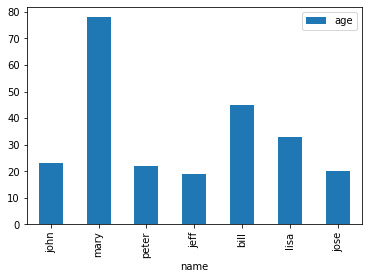

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

df.plot(kind='bar',x='name',y='age')

# the plot gets saved to 'output.png'
plt.savefig('output.png')

##### Bar plot with group by

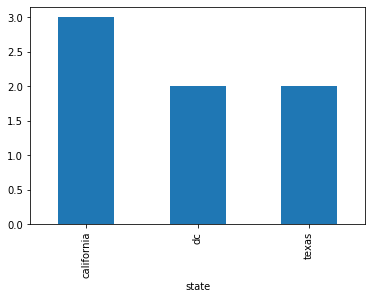

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

df.groupby('state')['name'].nunique().plot(kind='bar')
plt.show()

##### Stacked bar plot with group by

Example: plot count by category as a stacked column:

    create a dummy variable and do a two-level group-by based on it:

    fix the x axis label and the legend

Example: plot count by category as a stacked column:

    create a dummy variable and do a two-level group-by based on it:

    fix the x axis label and the legend

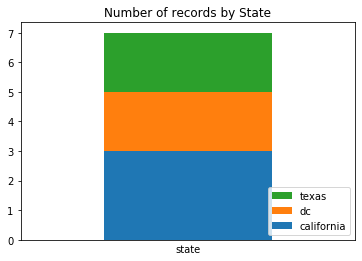

In [8]:
import matplotlib.pyplot as plt

# create dummy variable them group by that
# set the legend to false because we'll fix it later
df.assign(dummy = 1).groupby(
  ['dummy','state']
).size().to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

plt.title('Number of records by State')

# other it'll show up as 'dummy' 
plt.xlabel('state')

# disable ticks in the x axis
plt.xticks([])

# fix the legend
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)

labels = reversed(df['state'].unique())

plt.legend(reversed_handles,labels,loc='lower right')
plt.show()


### Stacked bar plot with group by, normalized to 100% Permalink

A plot where the columns sum up to 100%.

Similar to the example above but:

    normalize the values by dividing by the total amounts

    use percentage tick labels for the y axis

Example: Plot percentage count of records by state

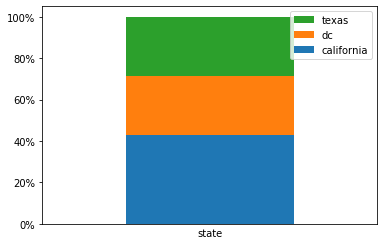

In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# create dummy variable then group by that
# set the legend to false because we'll fix it later
df.assign(dummy = 1).groupby(
  ['dummy','state']
).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

# or it'll show up as 'dummy' 
plt.xlabel('state')

# disable ticks in the x axis
plt.xticks([])

# fix the legend or it'll include the dummy variable
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)
correct_labels = reversed(df['state'].unique())

plt.legend(reversed_handles,correct_labels)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()


Stacked bar plot, two-level group by
Permalink

Just do a normal groupby() and call unstack():

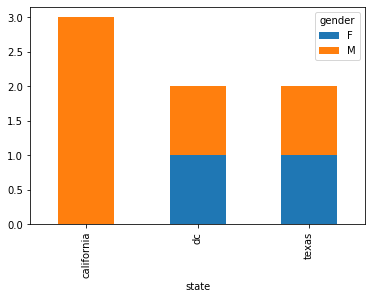

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

df.groupby(['state','gender']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

Another example: count the people by gender, spliting by state:

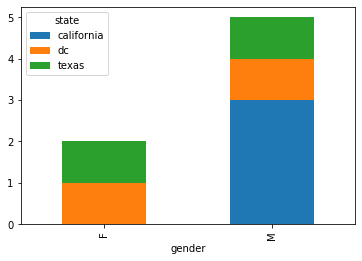

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

df.groupby(['gender','state']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

Stacked bar plot with two-level group by, normalized to 100%
Permalink

Sometimes you are only ever interested in the distributions, not raw amounts:

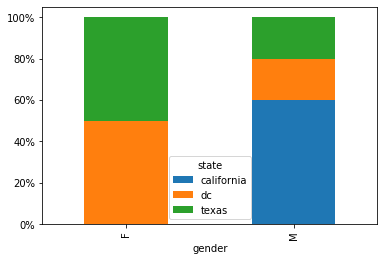

In [12]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

df.groupby(['gender','state']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

Histogram of column values

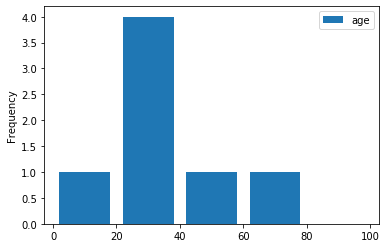

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

df[['age']].plot(kind='hist',bins=[0,20,40,60,80,100],rwidth=0.8)
plt.show()

Date histogram
Permalink

    To convert from custom formats see: (Column to datetime: custom format)[http://queirozf.com/entries/pandas-dataframe-examples-manipulating-date-and-time#string-column-to-date-datetime-custom-format]

To plot the number of records per unit of time, you must a) convert the date column to datetime using to_datetime() b) call .plot(kind='hist'):

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# source dataframe using an arbitrary date format (m/d/y)
df = pd.DataFrame({
    'name':[
        'john','lisa','peter','carl','linda','betty'
    ],
    'date_of_birth':[
        '01/21/1988','03/10/1977','07/25/1999','01/22/1977','09/30/1968','09/15/1970'
    ]
})


In [15]:
df

,name,date_of_birth
0,john,01/21/1988
1,lisa,03/10/1977
2,peter,07/25/1999
3,carl,01/22/1977
4,linda,09/30/1968
5,betty,09/15/1970


Now convert the date column into datetime type and use plot(kind='hist'):

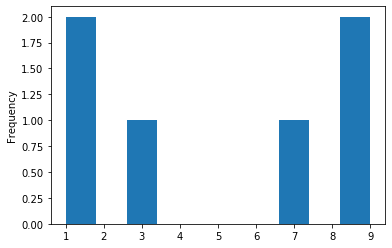

In [16]:
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], infer_datetime_format=True)

plt.clf()
df['date_of_birth'].map(lambda d: d.month).plot(kind='hist')
plt.show()
